In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('data/leads.csv')
# data = data.sample(frac=0.01)
data.head(10)


,student_id,leads
0,1,93
1,2,91
2,3,97
3,4,2000
4,5,85
5,6,78
6,7,4200
7,8,100
8,9,100
9,10,95


/Users/akhilsachdev/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


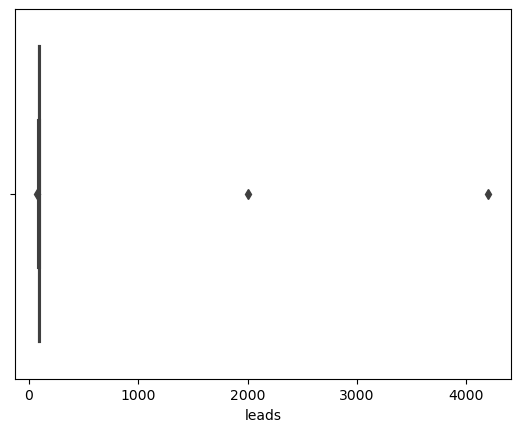

In [51]:
sns.boxplot(data.leads)
plt.show()


In [52]:
random_state = np.random.RandomState(42)
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.2, random_state=random_state)
le = preprocessing.LabelEncoder()
# data["type"] = le.fit_transform(data['type'])
# data['type'] = data["type"].astype('category')
model.fit(data[["leads"]])
print(model.get_params())



{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FA4D82E8140, 'verbose': 0, 'warm_start': False}


/Users/akhilsachdev/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [59]:
data['scores'] = model.decision_function(data[["leads"]])
data['anomaly_score'] = model.predict(data[["leads"]])
data[data['anomaly_score']==-1].iloc[0]['student_id']

4.0